# Capstone проект №1
# Идентификация пользователей по посещенным веб-страницам

## Выполнил: Вершинин Александр

Решалась задача идентификации пользователя по его поведению в сети. Для классификации мы использовали признаковое описание сессии - совокупности посещенных подряд сайтов и времени каждого посещения.

Первым этапом работы была обработка первичных данных - для каждого пользователя была дана последовательность пар (сайт, время). Данные были преобразованы в совокупность сессий, а также создавался частотный словарь сайтов для возможности изучения предпочтений пользователей в заданной выборке.

Мы использовали разреженный формат данных csr_matrix, чтобы в качестве признаков использовать индексы посещения сайтов в сессии. Количество сайтов и сессий не позволяло хранить всю матрицу в привычных форматах.

Пример: самые популярные сайты в выборке из 150 пользователей

In [7]:
with open('capstone_user_identification/site_freq_150users.pkl', 'rb') as f:
    site_freq_150users = pickle.load(f)

for t in site_freq_150users:
    if site_freq_150users[t][1] > 16300:
        print (t, site_freq_150users[t])

www.facebook.com (2, 39002)
www.google.fr (6, 64785)
apis.google.com (7, 29983)
www.google.com (8, 51320)
clients1.google.com (28, 25087)
safebrowsing-cache.google.com (42, 17960)
mail.google.com (43, 19072)
plus.google.com (56, 18467)
s.youtube.com (89, 29102)
www.youtube.com (102, 16319)


Были введены новые признаки:

1. Продолжительность сессии
2. Месяц начала сессии
3. День недели начала сессии
4. Индикатор выходного дня
5. Час начала сессии
6. Число уникальных сайтов сессии
7. Медианное время между переходами по сайтам
8. Были сгенерированы типичные подстроки для названий сайтов, которым отдает предпочтение необходимый пользователь. Для них также были введены индексы посещения

Для новых признаков был применен StandardScaler.

В качестве примера мы можем рассмотреть распределения некоторых признаков для различных пользователей. Видно, что на небольшой выборке мы можем дать неплохое поведенческое описание для каждого пользователя.

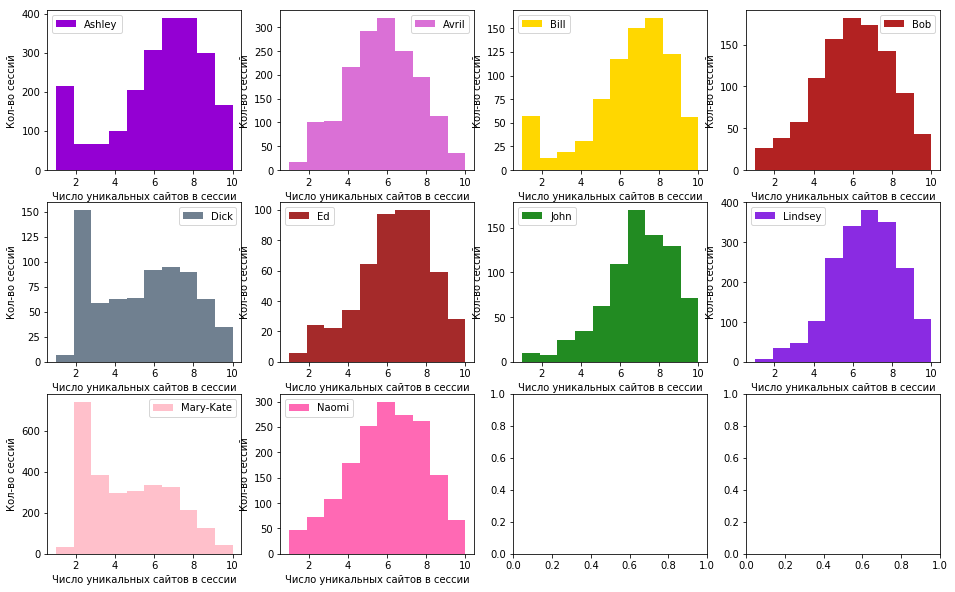

In [14]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16, 10))
i,j = 0, 0
for idx, (user, sub_df) in  enumerate(train_data_10users.groupby('target')): 
    axes[i][j].hist( sub_df['#unique_sites'], color=color_dic[user], label=user)
    axes[i][j].set_ylabel('Кол-во сессий')
    axes[i][j].set_xlabel('Число уникальных сайтов в сессии')
    axes[i][j].legend()
    if j==3:
        i+=1
        j=0
    else:
        j+=1

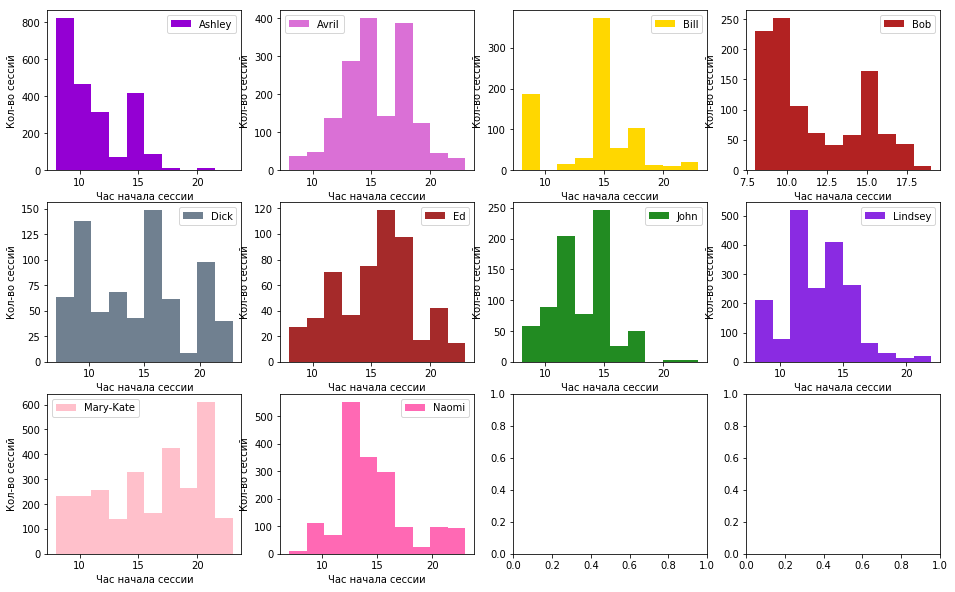

In [15]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16, 10))
i,j = 0, 0
for idx, (user, sub_df) in  enumerate(train_data_10users.groupby('target')): 
    axes[i][j].hist( sub_df['start_hour'], color=color_dic[user], label=user)
    axes[i][j].set_ylabel('Кол-во сессий')
    axes[i][j].set_xlabel('Час начала сессии')
    axes[i][j].legend()
    if j==3:
        i+=1
        j=0
    else:
        j+=1

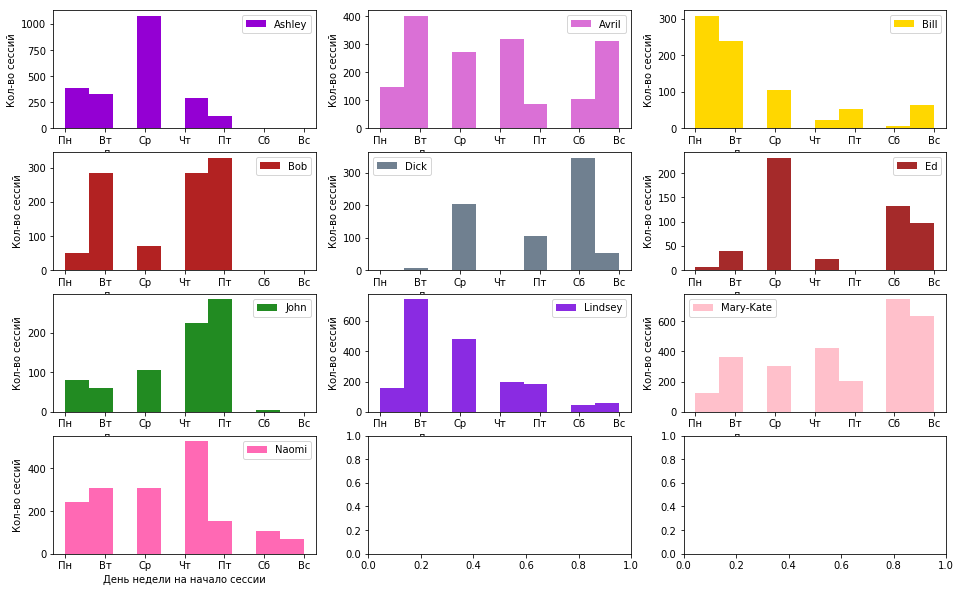

In [16]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(16, 10))
i,j = 0, 0
for idx, (user, sub_df) in  enumerate(train_data_10users.groupby('target')): 
    axes[i][j].hist( sub_df['day_of_week'], color=color_dic[user], label=user, range=(0, 6))
    axes[i][j].set_ylabel('Кол-во сессий')
    axes[i][j].set_xlabel('День недели на начало сессии')
    axes[i][j].legend()
    axes[i][j].set_xticklabels(['t', 'Пн', 'Вт', 'Ср', 'Чт', 'Пт', 'Сб', 'Вс'])
    if j==2:
        i+=1
        j=0
    else:
        j+=1

Финальная задача - попытка отделить одного пользователя от всех остальных.

Были проведены испытания с различными классификаторами с различными параметрами, были попытки комбинировать результаты различных алгоритмов; изучалось изменение качества при добавлении новых признаков. Отмечу серьезную проблему с переобучением, зачастую "более натренированный" классификатор давал худший результат.

Мой итоговый результат - 0.95107 ([YDF & MIPT] Coursera_Vershinin), он был получен с помощью логистической регрессии. Замечу, что по ходу выполнения проекта комбинация классификаторов давала наилучший результат, но на финише победил "индивидуализм". ROC AUC на отложенной выборке составил 0.987654.

В итоге я склонен оценить свою работу как удовлетворительную. Результат хоть и является приемлемым, но далеко не выдающимся, до решения практических задач тут далеко. Проект наглядно показывает слабые места учеников и указывает направление для саморазвития. Чем и следует заниматься.